In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import sklearn

In [136]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [138]:
#areatype, availability not needed
#society and balcony has many null value 

df = df.drop(['area_type','availability','society', 'balcony'], axis =1)


In [139]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [140]:
df.info()
df['location'].value_counts() 
#as 'Whitefield' has the maximum count

df['location'] = df['location'].fillna('Whitefield')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [141]:
df['size'].value_counts() #2 bhk has the max counts
df['size'] = df['size'].fillna('2 BHK')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [143]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [144]:
#df['bath'] has float values so we can fillna with median

df['bath'] = df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [145]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [146]:
out = [i.split()[0] for i in df['size'] ]
out
df['bhk'] = out
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [147]:
df['total_sqft'].unique()
def convert(a):
    l = a.split('-')
    if len(l)==2:
        return (float(l[0]) + float(l[1]))/2
    try:
        return float(a)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert)


    

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  object 
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [149]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [150]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  object 
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [152]:
df['location'].unique()
df['location'] = df['location'].apply(lambda x: x.strip())

df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1294,), dtype=object)

In [153]:
df['location'].value_counts()
location_count = df['location'].value_counts()
loc_less_than_10 =location_count[location_count<=10]
df['location'] = df['location'].apply(lambda x:'Other' if x in loc_less_than_10 else x)

In [154]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Devanahalli', 'Varthur', 'Bommanahalli', 'Gunjur',
       'Devarachikkanahalli', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  object 
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [156]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [157]:
df['price_per_totalsqft'] = (df['price']*10000)/df['total_sqft']
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_totalsqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             13320 non-null  object 
 1   size                 13320 non-null  object 
 2   total_sqft           13320 non-null  float64
 3   bath                 13320 non-null  float64
 4   price                13320 non-null  float64
 5   bhk                  13320 non-null  object 
 6   price_per_totalsqft  13320 non-null  float64
dtypes: float64(4), object(3)
memory usage: 728.6+ KB


In [159]:
df.head()
df['bhk'] = df['bhk'].astype(int)



In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             13320 non-null  object 
 1   size                 13320 non-null  object 
 2   total_sqft           13320 non-null  float64
 3   bath                 13320 non-null  float64
 4   price                13320 non-null  float64
 5   bhk                  13320 non-null  int64  
 6   price_per_totalsqft  13320 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 728.6+ KB


In [161]:
df.describe()

,total_sqft,bath,price,bhk,price_per_totalsqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+02
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+02
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+02
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [162]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_totalsqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [163]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_totalsqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [164]:
df.describe()

,total_sqft,bath,price,bhk,price_per_totalsqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+02
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+02
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+02
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [165]:
df= df[df['total_sqft']>=df['bhk']*300]

In [166]:
df.describe()

,total_sqft,bath,price,bhk,price_per_totalsqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,631.343679
std,1259.484400,1.077715,151.916676,0.976813,417.485429
min,300.000000,1.000000,8.440000,1.000000,26.782981
25%,1117.750000,2.000000,49.000000,2.000000,420.934477
50%,1300.000000,2.000000,70.000000,3.000000,529.554452
75%,1700.000000,3.000000,115.000000,3.000000,692.732501
max,52272.000000,16.000000,3600.000000,16.000000,17647.058824


In [167]:
df = df[df['bath']<=df['bhk']]

<Axes: ylabel='bath'>

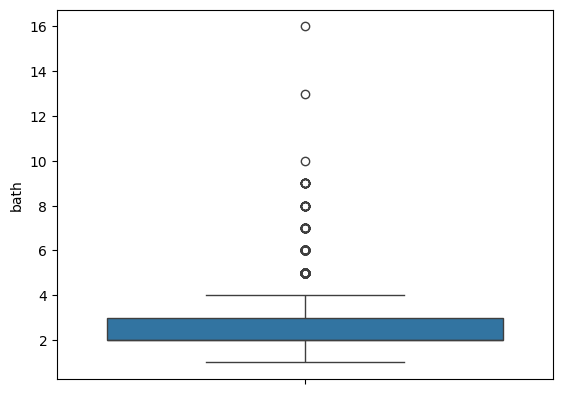

In [168]:
sns.boxplot(y = 'bath', data = df)

<Axes: ylabel='bath'>

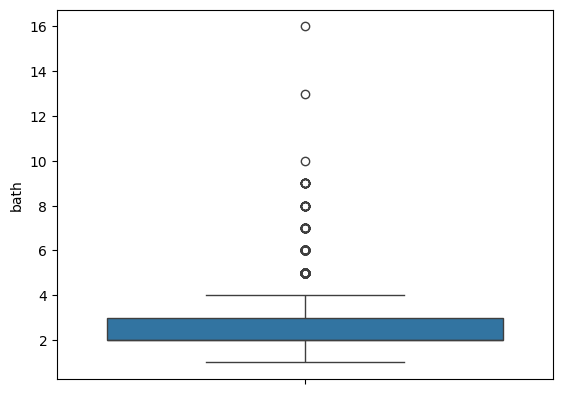

In [169]:
#handling outliers in bhk

df = df[df['bath'] <= df['bhk']]
sns.boxplot(y= 'bath', data = df)



<Axes: ylabel='bhk'>

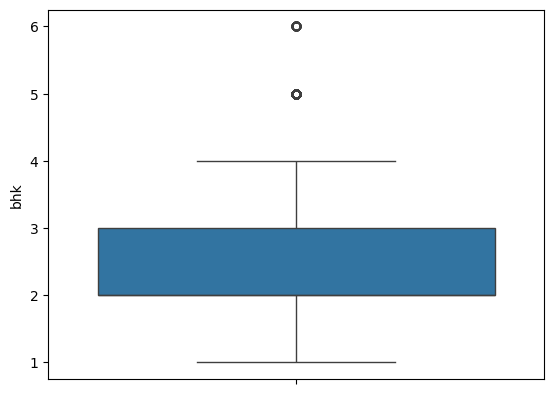

In [170]:
#handling outliers in bhk
df = df[df['bhk']<=6]
sns.boxplot(y = 'bhk', data = df)

<Axes: ylabel='price_per_totalsqft'>

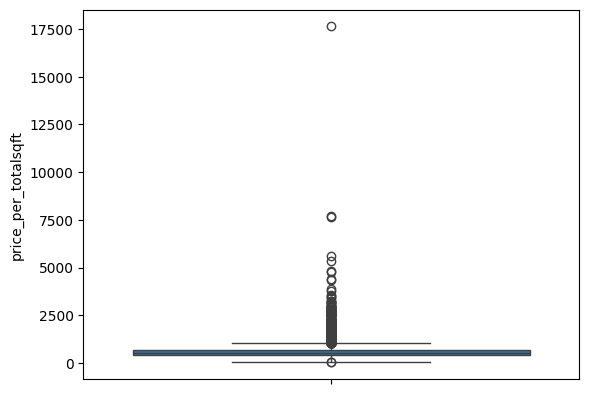

In [171]:
#handling outliers in price_per_totalsqft
sns.boxplot(y='price_per_totalsqft', data=df)

<Axes: ylabel='price_per_totalsqft'>

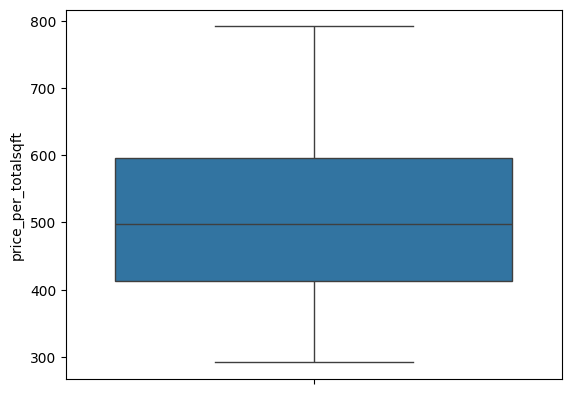

In [172]:
#handling outliers in price_per_sqft
q1 = df['price_per_totalsqft'].quantile(0.25)
q3 = df['price_per_totalsqft'].quantile(0.75)
IQR = q3-q1
low_bound = q1-0.5*IQR
up_bound = q3 +0.5* IQR
df = df[(df['price_per_totalsqft']>=low_bound)&(df['price_per_totalsqft']<=up_bound)]
sns.boxplot(y = 'price_per_totalsqft', data = df)

In [173]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_totalsqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325


In [174]:
df = df.drop(['size','price_per_totalsqft'], axis = 1)

In [175]:
df.reset_index(inplace = True)




In [176]:
df = df.drop(['index',], axis=1)

In [177]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Uttarahalli,1440.0,2.0,62.00,3
2,Lingadheeranahalli,1521.0,3.0,95.00,3
3,Kothanur,1200.0,2.0,51.00,2
4,Whitefield,1170.0,2.0,38.00,2


In [178]:
copied_dataset = df.copy()

In [179]:
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
df['location'] = obj.fit_transform(df['location'])
df.head()


,location,total_sqft,bath,price,bhk
0,78,1056.0,2.0,39.07,2
1,226,1440.0,2.0,62.00,3
2,158,1521.0,3.0,95.00,3
3,150,1200.0,2.0,51.00,2
4,235,1170.0,2.0,38.00,2


In [180]:
X = df.drop('price', axis = 1)
y = df['price']


In [181]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7,random_state=42)

In [182]:
model = RandomForestRegressor(random_state=42)
params = {
    "n_estimators":[100,150,200,250,300],
    "max_depth": [3,4,5,6]
}



In [186]:
grid= GridSearchCV(estimator=model, param_grid=params,cv=5)


In [187]:
grid.fit(Xtrain,ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [188]:
print('training_efficiency:', grid.score(Xtrain,ytrain))
print('testing efficiency:', grid.score(Xtest,ytest))

training_efficiency: 0.867338842041187
testing efficiency: 0.82311707868226


In [189]:
with open('RFmodel.pkl','wb') as file:
    pickle.dump(grid,file)

In [190]:
copied_dataset.to_csv('copied.csv')

In [191]:
sklearn.__version__

'1.7.1'